In [1]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


# 모듈 임포팅

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

In [3]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

# 데이터 준비


In [4]:
def get_sin_data(start=0, end=10, step=0.1):
  x = np.arange(start,end,step)
  np.random.shuffle(x)
  y = np.sin(x)

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)

In [5]:
def train_sin_with_noise(noise_size):

  # x = np.arange(0,10,0.1)
  x = np.arange(0,10,0.001)
  np.random.shuffle(x)
  y = np.sin(x)

  noiseless_y = np.copy(y) # ADD
  y = y + np.random.rand(y.shape[0])*noise_size - noise_size/2.0 # ADD

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]
  test_noiseless_y = noiseless_y[split_index:] # ADD

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()


  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=100)
  print("elapsed : {}".format(time.time() - start_time))    


  loss, mse = model.evaluate(test_x, test_y)
  print("loss=",loss)
  print("mse=",mse)


  y_ = model.predict(test_x)

  # plt.scatter(test_x,test_y)
  plt.scatter(test_x,test_y, s=1)
  plt.scatter(test_x,y_, s=1)
  plt.show()

# 노이즈 없을 때

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 97.35279750823975
4000/4000 [==============================] - 0s 38us/sample - loss: 2.2433e-04 - mean_squared_error: 2.2433e-04
loss= 0.00022433493321295827
mse= 0.00022433493


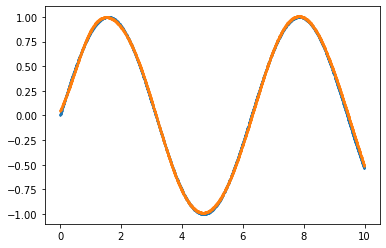

In [6]:
train_sin_with_noise(0.0)

# 노이즈 크기 0.1

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 97.20158553123474
4000/4000 [==============================] - 0s 38us/sample - loss: 0.0011 - mean_squared_error: 0.0011
loss= 0.0011343826120719313
mse= 0.0011343823


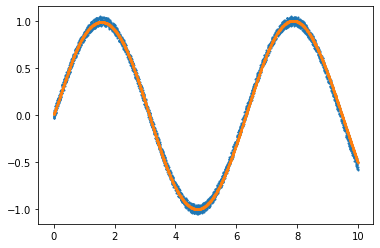

In [7]:
train_sin_with_noise(0.1)

# 노이즈 크기 0.5

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 98.30846810340881
4000/4000 [==============================] - 0s 38us/sample - loss: 0.0216 - mean_squared_error: 0.0216
loss= 0.021580859750509263
mse= 0.02158086


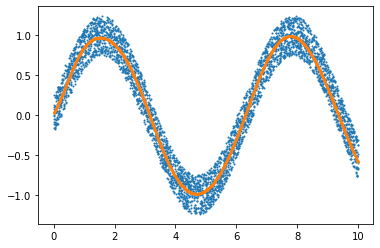

In [8]:
train_sin_with_noise(0.5)

# 노이즈 크기 1.0

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 100.6598436832428
4000/4000 [==============================] - 0s 42us/sample - loss: 0.0865 - mean_squared_error: 0.0865
loss= 0.08652249410748482
mse= 0.086522505


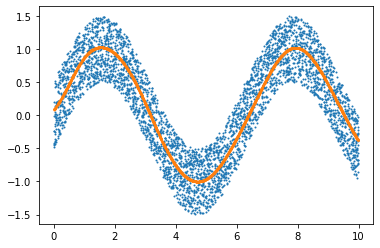

In [9]:
train_sin_with_noise(1.0)

# 노이즈 크기 10.0

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 98.65450620651245
4000/4000 [==============================] - 0s 41us/sample - loss: 8.2952 - mean_squared_error: 8.2952
loss= 8.295173458099365
mse= 8.295175


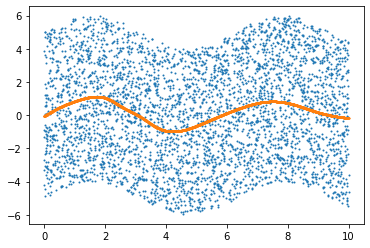

In [10]:
train_sin_with_noise(10.0)

# 노이즈 피쳐
노이즈 입력을 하나 더 준다.

In [11]:
x = np.arange(0,10,1.0)
np.random.shuffle(x)

y = np.zeros((x.shape[0],2))
y[:,0] = np.sin(x)
y[:,1] = np.random.rand(x.shape[0])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Train on 6000 samples
Epoch 1/100
6000/6000 [==============================] - 1s 96us/sample - loss: 0.3999 - mean_squared_error: 0.3999
Epoch 2/100
6000/6000 [==============================] - 1s 96us/sample - loss: 0.3383 - mean_squared_error: 0.3383
Epoch 3/100
6000/6000 [==============================] - 1s 103us/sample - loss: 0.3024 - mean_squared_error: 0.3024
Epoch 4/100
600

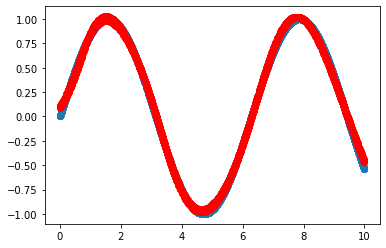

In [12]:
# x = np.arange(0,10,0.001)
x = np.zeros((10000,2))
x[:,0] = np.arange(0,10,0.001) # ADD
x[:,1] = np.random.rand(x.shape[0]) # ADD
np.random.shuffle(x)

# y = np.sin(x)
y = np.sin(x[:,0])

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x[:,0],test_y)
plt.scatter(test_x[:,0],y_,color='r')
plt.show()